# Data Analysis

## Load & Read the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
country_wise_latest = pd.read_csv("../DATA/country_wise_latest.csv", sep=',')
country_wise_latest.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [3]:
country_wise_latest.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [4]:
country_wise_latest.dtypes

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [5]:
# Rename the column name:
country_wise_latest.rename(columns={'Country/Region': 'Country'}, inplace=True)

### convert the columns heading to lower case.

In [6]:
country_wise_latest.columns = [col.strip().lower() for col in country_wise_latest.columns]

In [7]:
country_wise_latest.columns

Index(['country', 'confirmed', 'deaths', 'recovered', 'active', 'new cases',
       'new deaths', 'new recovered', 'deaths / 100 cases',
       'recovered / 100 cases', 'deaths / 100 recovered',
       'confirmed last week', '1 week change', '1 week % increase',
       'who region'],
      dtype='object')

### replace the columns format

In [8]:
country_wise_latest.columns = [col.replace('/', 'per') for col in country_wise_latest.columns]
country_wise_latest.columns = [col.replace(' ', '_') for col in country_wise_latest.columns]
country_wise_latest.columns

Index(['country', 'confirmed', 'deaths', 'recovered', 'active', 'new_cases',
       'new_deaths', 'new_recovered', 'deaths_per_100_cases',
       'recovered_per_100_cases', 'deaths_per_100_recovered',
       'confirmed_last_week', '1_week_change', '1_week_%_increase',
       'who_region'],
      dtype='object')

### convert the data to lower case.

In [9]:
obj = country_wise_latest.dtypes[country_wise_latest.dtypes == 'object'].index
country_wise_latest[obj] = country_wise_latest[obj].apply(lambda x:x.astype(str).str.lower())
country_wise_latest.head()

,country,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,deaths_per_100_cases,recovered_per_100_cases,deaths_per_100_recovered,confirmed_last_week,1_week_change,1_week_%_increase,who_region
0,afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,eastern mediterranean
1,albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,europe
2,algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,africa
3,andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,europe
4,angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,africa


In [10]:
country_wise_latest.dtypes

country                      object
confirmed                     int64
deaths                        int64
recovered                     int64
active                        int64
new_cases                     int64
new_deaths                    int64
new_recovered                 int64
deaths_per_100_cases        float64
recovered_per_100_cases     float64
deaths_per_100_recovered    float64
confirmed_last_week           int64
1_week_change                 int64
1_week_%_increase           float64
who_region                   object
dtype: object

### get the unique values

In [11]:
for col in country_wise_latest.columns:
    print(f"{col} ---> {len(country_wise_latest[col].unique())}")

country ---> 187
confirmed ---> 184
deaths ---> 150
recovered ---> 178
active ---> 173
new_cases ---> 122
new_deaths ---> 38
new_recovered ---> 103
deaths_per_100_cases ---> 145
recovered_per_100_cases ---> 177
deaths_per_100_recovered ---> 155
confirmed_last_week ---> 183
1_week_change ---> 162
1_week_%_increase ---> 169
who_region ---> 6


## Extract the data based on top 12 countries

country list = India, China, US, UK, France, Germany, Italy, Canada, Russia, Japan, Australia, Brazil

In [12]:
country_wise_latest_ = country_wise_latest.loc[(country_wise_latest['country'] == 'india') | 
                                               (country_wise_latest['country'] == 'us') |
                                               (country_wise_latest['country'] == 'china') |
                                               (country_wise_latest['country'] == 'united kingdom') |
                                               (country_wise_latest['country'] == 'france') |
                                               (country_wise_latest['country'] == 'germany') |
                                               (country_wise_latest['country'] == 'italy') |
                                               (country_wise_latest['country'] == 'canada') |
                                               (country_wise_latest['country'] == 'russia') |
                                               (country_wise_latest['country'] == 'japan') |
                                               (country_wise_latest['country'] == 'australia') |
                                               (country_wise_latest['country'] == 'brazil')
                                              ]
country_wise_latest_

,country,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,deaths_per_100_cases,recovered_per_100_cases,deaths_per_100_recovered,confirmed_last_week,1_week_change,1_week_%_increase,who_region
8,australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,western pacific
23,brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,americas
32,canada,116458,8944,0,107514,682,11,0,7.68,0.00,inf,112925,3533,3.13,americas
36,china,86783,4656,78869,3258,213,4,7,5.37,90.88,5.90,85622,1161,1.36,western pacific
61,france,220352,30212,81212,108928,2551,17,267,13.71,36.86,37.20,214023,6329,2.96,europe
65,germany,207112,9125,190314,7673,445,1,259,4.41,91.89,4.79,203325,3787,1.86,europe
79,india,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,south-east asia
85,italy,246286,35112,198593,12581,168,5,147,14.26,80.64,17.68,244624,1662,0.68,europe
87,japan,31142,998,21970,8174,594,0,364,3.20,70.55,4.54,25706,5436,21.15,western pacific
138,russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,europe


## Perform the analysis based on top 12 Countries

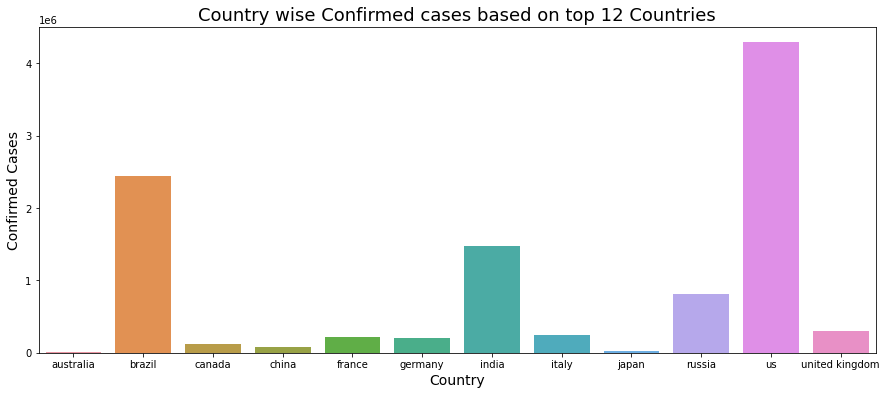

In [17]:
# plot the data: country wise Confirm cases

plt.figure(figsize=(15,6))
bar_plot = sns.barplot(x='country', y='confirmed', data=country_wise_latest_, )
bar_plot.set_title("Country wise Confirmed cases based on top 12 Countries", fontsize=18)
bar_plot.set_xlabel('Country', fontsize=14)
bar_plot.set_ylabel("Confirmed Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/Country_wise_Confirmed_cases_based_on_top_12_countries_BarPlot.png")
# plt.show()

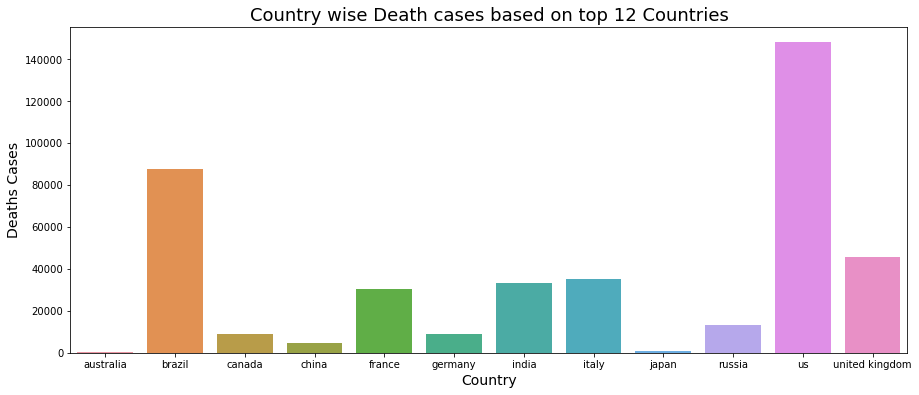

In [18]:
# plot the data: country wise Death cases

plt.figure(figsize=(15,6))
bar_plot = sns.barplot(x='country', y='deaths', data=country_wise_latest_, )
bar_plot.set_title("Country wise Death cases based on top 12 Countries", fontsize=18)
bar_plot.set_xlabel('Country', fontsize=14)
bar_plot.set_ylabel("Deaths Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/Country_wise_Death_cases_based_on_top_12_countries_BarPlot.png")
# plt.show()

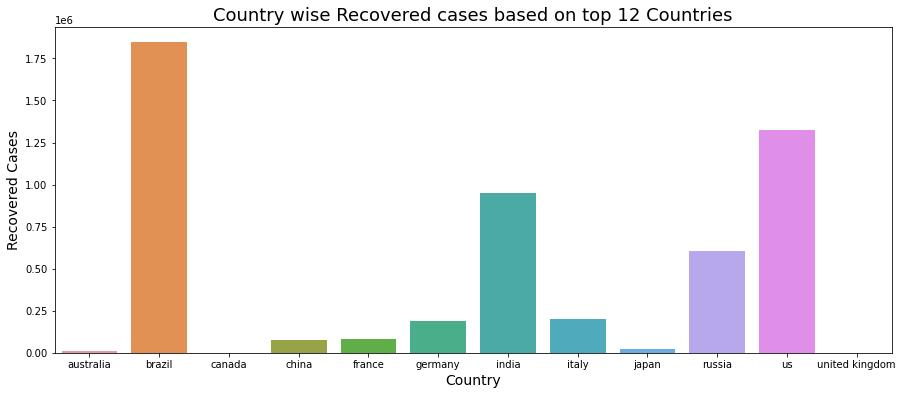

In [19]:
# plot the data: country wise Recovered cases

plt.figure(figsize=(15,6))
bar_plot = sns.barplot(x='country', y='recovered', data=country_wise_latest_, )
bar_plot.set_title("Country wise Recovered cases based on top 12 Countries", fontsize=18)
bar_plot.set_xlabel('Country', fontsize=14)
bar_plot.set_ylabel("Recovered Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/Country_wise_Recovered_cases_based_on_top_12_countries_BarPlot.png")
plt.show()

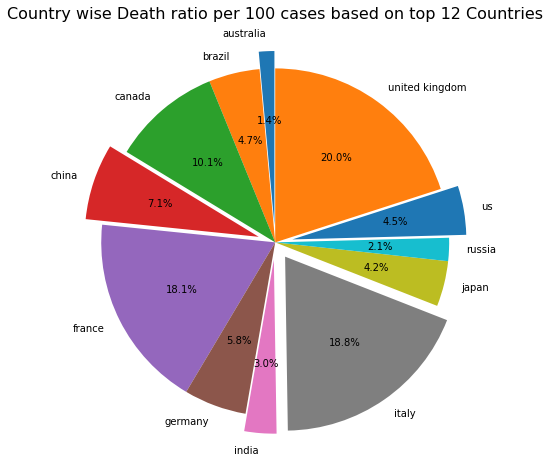

In [23]:
# Country wise Death ratio Per 100 cases:

plt.figure(figsize=(15,8))
explode = (0.1, 0, 0, 0.1, 0, 0, 0.1, 0.1, 0, 0, 0.1, 0)
plt.pie(x=country_wise_latest_['deaths_per_100_cases'], labels=country_wise_latest_['country'], 
        explode=explode, autopct='%1.1f%%', startangle=90)
plt.title("Country wise Death ratio per 100 cases based on top 12 Countries", fontsize=16)
# plt.savefig("../Plots or Graphs Pictures/Country_wise_Death_ratio_per_100_cases_based_on_top_12_countries_PieChart.png")
plt.show()

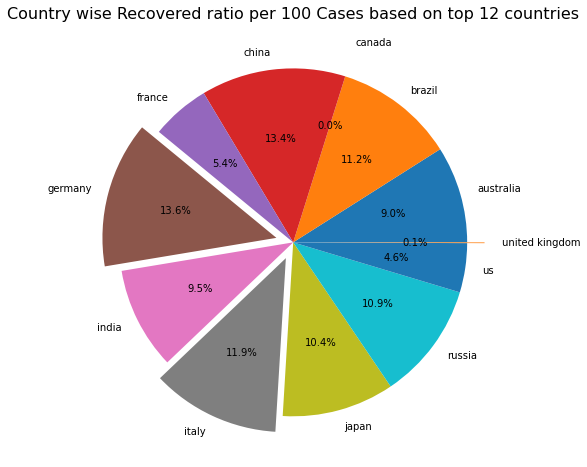

In [21]:
# Country wise Recovered ratio Per 100 cases:

plt.figure(figsize=(17,8))
explode = (0, 0, 0.1, 0, 0, 0.1, 0, 0.1, 0, 0, 0, 0.1)
plt.pie(x=country_wise_latest_['recovered_per_100_cases'], labels=country_wise_latest_['country'], 
           autopct='%1.1f%%', explode=explode)
plt.title("Country wise Recovered ratio per 100 Cases based on top 12 countries", fontsize=16)
# plt.savefig("../Plots or Graphs Pictures/Country_wise_Recovered_ratio_per_100_cases_based_on_top_12_countries_PieChart.png")
plt.show()

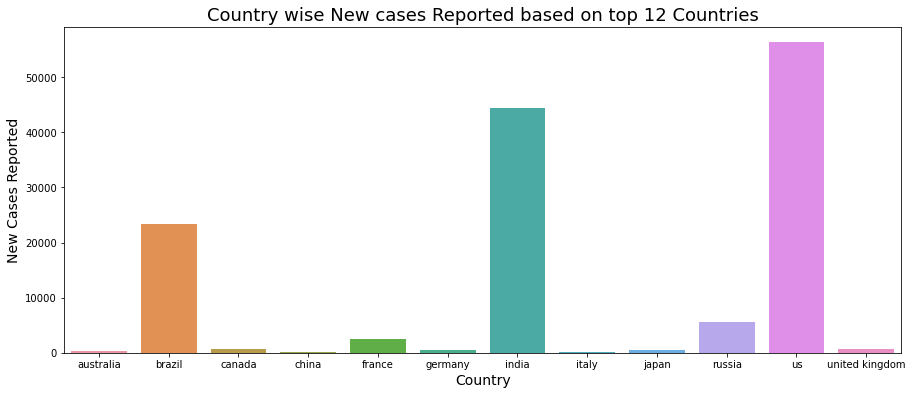

In [22]:
# plot the data: country wise New cases Reported

plt.figure(figsize=(15,6))
bar_plot = sns.barplot(x='country', y='new_cases', data=country_wise_latest_, )
bar_plot.set_title("Country wise New cases Reported based on top 12 Countries", fontsize=18)
bar_plot.set_xlabel('Country', fontsize=14)
bar_plot.set_ylabel("New Cases Reported", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/Country_wise_new_cases_reported_based_on_top_12_countries_BarPlot.png")
plt.show()